# Grading Concept Maps



In [1]:
from cxlparser import Cxl
import os
from cxldata import ScoredCxl
import networkx

[ItemsView(NodeView(('21BG071V0-1Z5524J-15T', '21BG0CZTR-1R6RBM0-1Y0', '21BG104LS-1TX4LW1-6RH', '21BG11R9N-WC1DZH-74D', '21BG0Y3V5-10SLYD0-64D', '21BG0WR7S-WGDF28-5PM', '21BFXYMRR-1YG0QKZ-8T', '21BG068R1-4NXJ1P-VH', '21BG06SBD-BNX679-12K', '21BG06P24-8D8KN9-122', '21BG0NXLZ-3GXTJR-38P', '21BG0NGSG-73DWQN-379', '21BG0P2NL-1MCNLS9-398', '21BG0LDMD-WXGBHG-2YH', '21BG12KBD-1VKPKRN-7GH', '21BG12MBR-10CLD8N-7H8', '21BG0ZZJC-1CT9QXL-6Q7', '21BG101QP-2DDFWW-6R0', '21BG1BM4D-219GG1C-8RG', '21BG1BQSC-X6SCRV-8S9', '21BG0VSXW-285SXD8-5FB', '21BG0W4RR-2CP3ZY5-5K6', '21BG0VN6G-1KBL286-5DF', '21BG0F27G-130XJ0B-29P', '21BG0F7DP-KRNT71-2F0', '21BG0DXRJ-4RC8H1-28V', '21BG09DY3-N4BCL1-1HK', '21BG09H6Q-21F82RV-1J5', '21BG082VN-49R2JP-1B1', '21BG09KXD-3MYCXQ-1JS', '21BG09PC9-1RNY30J-1KD', '21BG09B6H-XNGRTS-1GX', '21BG134SZ-1X1K97C-7LT', '21BG0XT5M-2CNG6X4-60P', '21BG164Q5-116QM86-7ZN', '21BG17NP5-2DCW5DP-89B', '21BG0TH3Q-LBTPHN-53P', '21BG0V17R-84YXFQ-57Q', '21BG0S9FZ-1H560Q4-4S1', '21BG116N8-98TBWT-70L', 

KeyError: '21BG0LLQ2-814FJY-2ZF'

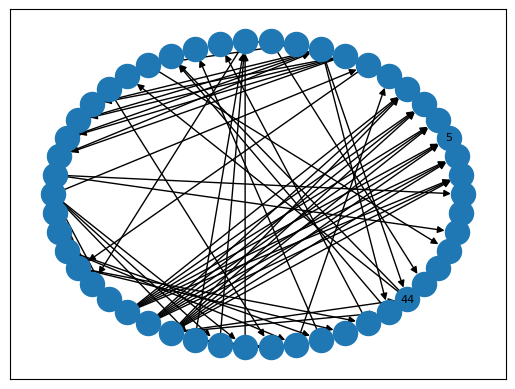

In [2]:
paths = ["cmaps/CS_Tech_2.cmap.cxl", "cmaps/IndustEngOrganization.cxl"] # Bacterial Characteristics
expert_path = "cmaps/AeroCapture.cxl"
fuzzy = False
parsed_cmaps = [Cxl(i, fuzzy, os.path.basename(i)) for i in paths]
expert_cmap = Cxl(expert_path, fuzzy, os.path.basename(expert_path))
for i in range(len(parsed_cmaps)):
    parsed_cmaps[i].parse_map()
[str(i) for i in parsed_cmaps]
print(str([parsed_cmaps[1].graph.nodes.items()]))
parsed_cmaps[1]._find_leaves()
Cxl.show_map(parsed_cmaps[1])



In [7]:
sc = ScoredCxl(parsed_cmaps[1])
sc.score_density()
print("\n".join([", ".join(["".join([k if k != '\n' else " " for k in sc.cmap.concepts_by_id[i]['label']]) for i in j]) for j in list(sc.score(1))]))
sc.find_centers(True, True)

sorted_items = sorted(sc.center["eigenvector_center"].items(), key=lambda item: item[1])
print(sorted_items)
sc.cmap._find_leaves()
print(sc.cmap.no_incoming_ids,sc.cmap.no_outgoing_ids)
print(float(Cxl.link_count(sc.cmap, "21BG071V0-1Z5524J-15T", [Cxl.LinkType.CROSS, Cxl.LinkType.REVERSE]))/Cxl.link_count(sc.cmap, "21BG071V0-1Z5524J-15T", [Cxl.LinkType.ALL]))
print(networkx.transitivity(sc.cmap.graph))
print(networkx.barycenter(sc.cmap.graph.to_undirected()))



36, 30, 31, 34, 25, 32, 33, 27, 29, 28, 35
9, 5, 4, 7, 10, 8, 2, 1, 6, 3
14, 11, 13, 12, 13, 15
17, 15, 0, 16, 14, 18
22, 24, 21, 23, 19, 20
45, 40, 39, 26, 46, 41, 43, 37, 44, 42, 38
[('21BG0W4RR-2CP3ZY5-5K6', 0.00022155542034835033), ('21BG0VSXW-285SXD8-5FB', 0.0005266954657349305), ('21BG0VN6G-1KBL286-5DF', 0.0005266954657349305), ('21BG134SZ-1X1K97C-7LT', 0.0008051849098149656), ('21BG13BSG-Y8P4BD-7MQ', 0.0008051849098149656), ('21BG0V17R-84YXFQ-57Q', 0.002282698639441399), ('21BG0V3ZX-277F1LG-58J', 0.002282698639441399), ('21BG0F7DP-KRNT71-2F0', 0.0025329540987141805), ('21BG116N8-98TBWT-70L', 0.0029516943556144168), ('21BG12KBD-1VKPKRN-7GH', 0.003828457256188506), ('21BG12MBR-10CLD8N-7H8', 0.003828457256188506), ('21BG0F27G-130XJ0B-29P', 0.006022184674742548), ('21BG0DXRJ-4RC8H1-28V', 0.006022184674742548), ('21BG0TH3Q-LBTPHN-53P', 0.010327034932283305), ('21BG0L0YC-9016C2-2XB', 0.012381955511707132), ('21BG0ZZJC-1CT9QXL-6Q7', 0.013414226107104368), ('21BG101QP-2DDFWW-6R0', 0.014